<a href="https://colab.research.google.com/github/Zaier9/Practicas-en-Colab/blob/main/Graficando_con_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wines = datasets.load_wine()
X_wines = wines.data
Y_wines = wines.target

In [7]:
xw = pd.DataFrame(X_wines, columns=['Alcohol', 'Malic Acid', 'Ash', 
                                    'Alcalinity of Ash', 'Magnesium',
                                    'Total Phenols', 'Flavanoids', 'Nonflavanoids Phenols',
                                    'Proanthocyanins', 'Color Intensity', 'Hue',
                                    'OD280/OD315 of diluted wines', 'Proline'])

yw = pd.DataFrame(Y_wines, columns=['Target'])
xw.head(5)

,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoids Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [17]:
modelw = KMeans(n_clusters=3, max_iter=1000)
modelw.fit(xw)
yw_labels = modelw.labels_
yw_kmeans = modelw.predict(xw)
print('Predicciones ', yw_kmeans)
yw_kmeans_df = pd.DataFrame(yw_kmeans, columns=['Prediction'])

Predicciones  [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 2 0 2 2 0 0 0 2 2 1
 0 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0
 0 2 2 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0 2]


In [18]:
accuracy = metrics.adjusted_rand_score(Y_wines, yw_kmeans)
print(accuracy)

0.37111371823084754


In [19]:
Z = pd.concat([xw, yw_kmeans_df], axis=1)

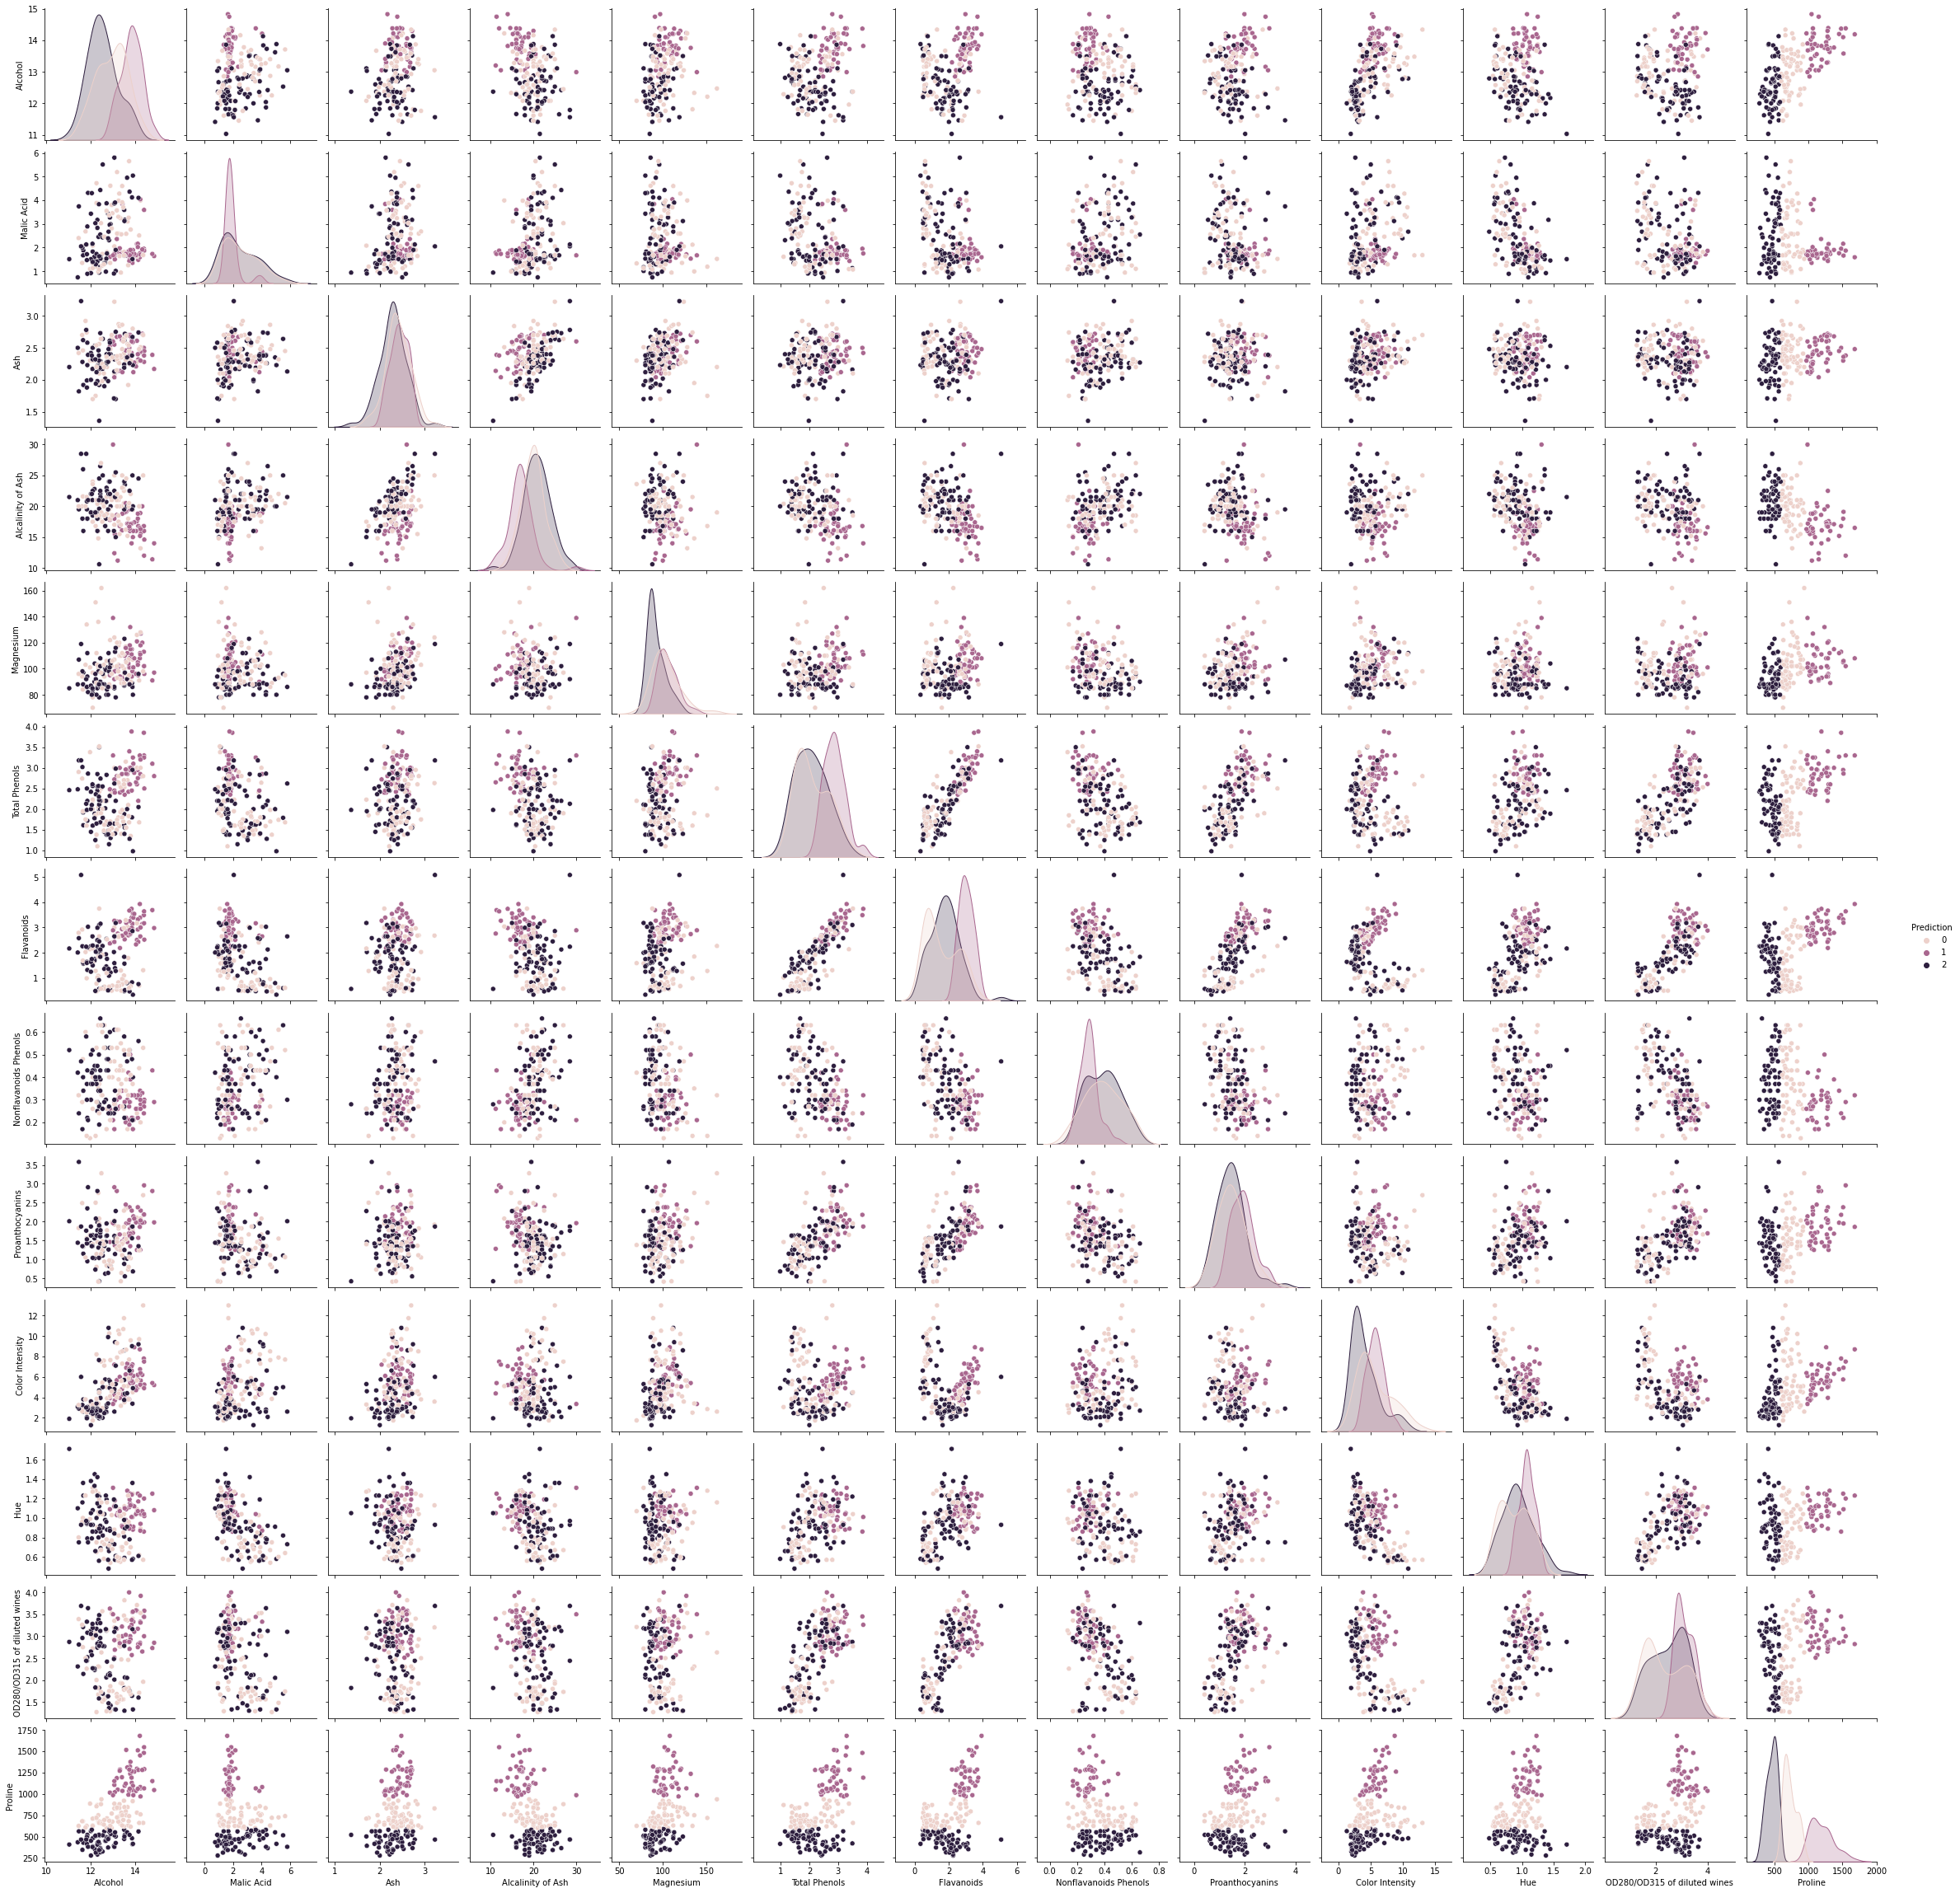

In [20]:
sns.pairplot(Z, hue='Prediction')